In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.gridspec as gridspec
import pickle5
sys.path.append( "../../data_evaluation")
import handle_dictionaries
import spikeTrainAnalysis as sta
from scipy.interpolate import griddata
import scipy.sparse
from scipy.optimize import curve_fit

Notes

# generate Figure from preevaluated data

[0.5, 0.5]


<ipython-input-28-acac671a592d>:232: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','','',''], fontsize = ticksFontsize)


Text(350, 200, '$\\mathcal{W}_{11}$')

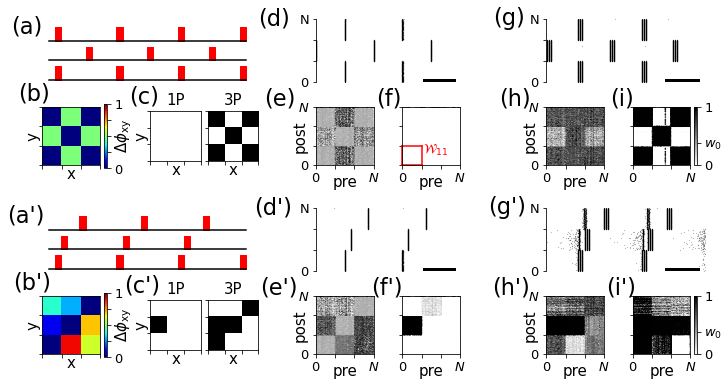

In [40]:
labelFontsize = 15
ticksFontsize = 13

# left column
x1 = 0.05
x2 = 0.13+0.02
x3 = 0.15+0.05
x4 = 0.22+0.05
x5 = 0.23+0.05
x6 = 0.35

# middle column
x7 = 0.43
x8= 0.51
x11= 0.55
x12= 0.63

# right column
x13= 0.75
x14= 0.83
x15= 0.87
x16 = 0.95 + 0.02

# bottom
offset = 0.05
y1 = (0.1-offset)*0.5
y2 = (0.5-offset)*0.5
y3 = (0.6-offset)*0.5
y4 = (0.95-offset)*0.5

# top
y5 = 1.1*0.5
y6 = 1.5*0.5
y7 = 1.6*0.5
y8 = 1.95*0.5

# illustration of  phase shifts
# left part of figure
gsPattern2 = gridspec.GridSpec(1, 1)
gsPattern2.update(left=x1, right=x6, top=y4, bottom=y3)

gsPhases2 = gridspec.GridSpec(1, 1)
gsPhases2.update(left=x1, right=x2, top=y2, bottom=y1)

gsTheoryCon_e2 = gridspec.GridSpec(1, 1)
gsTheoryCon_e2.update(left=x3, right=x4, top=y2, bottom=y1)

gsTheoryCon_v2 = gridspec.GridSpec(1, 1)
gsTheoryCon_v2.update(left=x5, right=x6, top=y2, bottom=y1)


gsPattern1 = gridspec.GridSpec(1, 1)
gsPattern1.update(left=x1, right=x6, top=y8, bottom=y7)

gsPhases1 = gridspec.GridSpec(1, 1)
gsPhases1.update(left=x1, right=x2, top=y6, bottom=y5)

gsTheoryCon_e1 = gridspec.GridSpec(1, 1)
gsTheoryCon_e1.update(left=x3, right=x4, top=y6, bottom=y5)

gsTheoryCon_v1 = gridspec.GridSpec(1, 1)
gsTheoryCon_v1.update(left=x5, right=x6, top=y6, bottom=y5)


######################################
### single pulse stimuli
######################################
# spiketrain 1
gsSpikeTrain_e1 = gridspec.GridSpec(1, 1)
gsSpikeTrain_e1.update(left=x7, right=x12, top=y8, bottom=y7)
# spiketrain 2
gsSpikeTrain_e2 = gridspec.GridSpec(1, 1)
gsSpikeTrain_e2.update(left=x7, right=x12, top=y4, bottom=y3)
# connectivity matrix 1 early
gsCon_matrix_e1_early = gridspec.GridSpec(1, 1)
gsCon_matrix_e1_early.update(left=x7, right=x8, top=y6, bottom=y5)
# connectivity matrix 1 late
gsCon_matrix_e1_late = gridspec.GridSpec(1, 1)
gsCon_matrix_e1_late.update(left=x11, right=x12, top=y6, bottom=y5)
# connectivity matrix 2 early
gsCon_matrix_e2_early = gridspec.GridSpec(1, 1)
gsCon_matrix_e2_early.update(left=x7, right=x8, top=y2, bottom=y1)
# connectivity matrix 2 late
gsCon_matrix_e2_late = gridspec.GridSpec(1, 1)
gsCon_matrix_e2_late.update(left=x11, right=x12, top=y2, bottom=y1)


######################################
### burst stimuli
######################################
# spiketrain 1
gsSpikeTrain_v1 = gridspec.GridSpec(1, 1)
gsSpikeTrain_v1.update(left=x13, right=x16, top=y8, bottom=y7)
# spiketrain 2
gsSpikeTrain_v2 = gridspec.GridSpec(1, 1)
gsSpikeTrain_v2.update(left=x13, right=x16, top=y4, bottom=y3)
# connectivity matrix 1 early
gsCon_matrix_v1_early = gridspec.GridSpec(1, 1)
gsCon_matrix_v1_early.update(left=x13, right=x14, top=y6, bottom=y5)
# connectivity matrix 1 late
gsCon_matrix_v1_late = gridspec.GridSpec(1, 1)
gsCon_matrix_v1_late.update(left=x15, right=x16, top=y6, bottom=y5)
# connectivity matrix 2 early
gsCon_matrix_v2_early = gridspec.GridSpec(1, 1)
gsCon_matrix_v2_early.update(left=x13, right=x14, top=y2, bottom=y1)
# connectivity matrix 2 late
gsCon_matrix_v2_late = gridspec.GridSpec(1, 1)
gsCon_matrix_v2_late.update(left=x15, right=x16, top=y2, bottom=y1)

fig = plt.figure( figsize = (10,5) )


###########################################
###########################################
# left column
# illustration of stimulus pattern
fCR_Hz = 7.0 # Hz
Dpulse = 0.1
Hpulse = 0.7

# first phase shifts
Dalpha_vec1 = [0.5, 0.5]
Dalpha_vec2 = [0.1, 0.3]

ax_Pattern1 = fig.add_subplot( gsPattern1[0,0] )
plot_pattern( ax_Pattern1 , Dalpha_vec1  )

# illustration of stimulus pattern
ax_Phases1 = fig.add_subplot( gsPhases1[0,0] )
plotPhases( ax_Phases1 , Dalpha_vec1  )

### single pulse stimuli
ax_TheoryCon_e1 = fig.add_subplot( gsTheoryCon_e1[0,0] )

# define parameter set
parSet = {}
parSet['fCR_Hz'] = 5.0 # Hz
parSet['PpB'] = 1
parSet['Astim'] = 0.4
parSet['de'] = 1.0

plotTheoryCon( ax_TheoryCon_e1, Dalpha_vec1, parSet, parSet['fCR_Hz'] )
ax_TheoryCon_e1.set_xlabel('x', fontsize = labelFontsize, labelpad=-5)
ax_TheoryCon_e1.set_ylabel('y', fontsize = labelFontsize, labelpad=-5)
ax_TheoryCon_e1.set_title('1P', fontsize = labelFontsize)

### burst stimuli
ax_TheoryCon_v1 = fig.add_subplot( gsTheoryCon_v1[0,0] )

# define parameter set
parSet = {}
parSet['fCR_Hz'] = 5.0 # Hz
parSet['PpB'] = 3
parSet['Astim'] = 0.8
parSet['f_intra'] = 120.0 # Hz
parSet['de'] = 1.0

print(Dalpha_vec1)
plotTheoryCon( ax_TheoryCon_v1, Dalpha_vec1, parSet, parSet['fCR_Hz'] )
# plotTheoryCon( ax_TheoryCon_v, Dalpha_vec1, sigma_v, fCR_Hz )
ax_TheoryCon_v1.set_xlabel('x', fontsize = labelFontsize, labelpad=-5)
ax_TheoryCon_v1.set_title('3P', fontsize = labelFontsize)


# first phase shifts
ax_Pattern2 = fig.add_subplot( gsPattern2[0,0] )
plot_pattern( ax_Pattern2 , Dalpha_vec2  )

# illustration of stimulus pattern
ax_Phases2 = fig.add_subplot( gsPhases2[0,0] )
# FIXME
# plotPhases( ax_Phases2 , Dalpha_vec2  )
# illustration of stimulus pattern
plotPhases( ax_Phases2 , Dalpha_vec2  )

### single stimuli
ax_TheoryCon_e2 = fig.add_subplot( gsTheoryCon_e2[0,0] )
sigma_e = 0.1 # ms

# define parameter set
parSet = {}
parSet['fCR_Hz'] = 5.0 # Hz
parSet['PpB'] = 1
parSet['Astim'] = 0.4
#parSet['f_intra'] 
parSet['de'] = 1.0

plotTheoryCon( ax_TheoryCon_e2, Dalpha_vec2, parSet, parSet['fCR_Hz'] )
ax_TheoryCon_e2.set_xlabel('x', fontsize = labelFontsize, labelpad=-5)
ax_TheoryCon_e2.set_ylabel('y', fontsize = labelFontsize, labelpad=-5)
ax_TheoryCon_e2.set_title('1P', fontsize = labelFontsize)

ax_TheoryCon_v2 = fig.add_subplot( gsTheoryCon_v2[0,0] )

# define parameter set
parSet = {}
parSet['fCR_Hz'] = 5.0 # Hz
parSet['PpB'] = 3
parSet['Astim'] = 0.8
parSet['f_intra'] = 120.0 # Hz
parSet['de'] = 1.0
plotTheoryCon( ax_TheoryCon_v2, Dalpha_vec2, parSet, parSet['fCR_Hz'] )
ax_TheoryCon_v2.set_xlabel('x', fontsize = labelFontsize, labelpad=-5)
ax_TheoryCon_v2.set_title('3P', fontsize = labelFontsize)

###########################################
### burst stimuli
# load data set
Teval_late = 4000
Teval_early = 3020
# parameters
pars = {}
pars['Astim'] = 0.8
pars['PpB'] = 3
pars['de'] = 1.0
pars['fCR_Hz'] = 5.0
pars['fintra_Hz'] = 120.0
pars['M'] = 3

# upper row phase lags
pars['Da1'] = 0.5
pars['Da2'] = 0.5
ax_SpikeTrain_v1 = fig.add_subplot( gsSpikeTrain_v1[0,0] )
plotSpiketrain( ax_SpikeTrain_v1 , Teval_late, pars )

ax_Con_matrix_v1_early = fig.add_subplot( gsCon_matrix_v1_early[0,0] )
plotCmatrix( ax_Con_matrix_v1_early , Teval_early, pars, False )

ax_Con_matrix_v1_late = fig.add_subplot( gsCon_matrix_v1_late[0,0] )
plotCmatrix( ax_Con_matrix_v1_late , Teval_late, pars, True )


# bottom row phase lags
pars['Da1'] = 0.1
pars['Da2'] = 0.3
ax_SpikeTrain_v2 = fig.add_subplot( gsSpikeTrain_v2[0,0] )
plotSpiketrain( ax_SpikeTrain_v2 , Teval_late, pars )

ax_Con_matrix_v2_early = fig.add_subplot( gsCon_matrix_v2_early[0,0] )
plotCmatrix( ax_Con_matrix_v2_early , Teval_early, pars, False )

ax_Con_matrix_v2_late = fig.add_subplot( gsCon_matrix_v2_late[0,0] )
plotCmatrix( ax_Con_matrix_v2_late , Teval_late, pars, True )

# set labels and ticks
# v1 early
ax_Con_matrix_v1_early.set_xlabel('pre', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_v1_early.set_ylabel('post', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_v1_early.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
# v1 late
ax_Con_matrix_v1_late.set_xlabel('pre', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_v1_late.set_xlabel('', fontsize = labelFontsize, labelpad=-10)

# v2 early
ax_Con_matrix_v2_early.set_xlabel('pre', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_v2_early.set_ylabel('post', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_v2_early.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
# v2 late
ax_Con_matrix_v2_late.set_xlabel('pre', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_v2_late.set_ylabel('', fontsize = labelFontsize, labelpad=-10)



###########################################
### single pulse stimuli
# load data set
Teval_late = 4000
Teval_early = 3020
# parameters
pars = {}
pars['Astim'] = 0.4
pars['PpB'] = 1
pars['de'] = 1.0
pars['fCR_Hz'] = 5.0
pars['M'] = 3

### upper row phase lags
pars['Da1'] = 0.5
pars['Da2'] = 0.5
ax_SpikeTrain_e1 = fig.add_subplot( gsSpikeTrain_e1[0,0] )
plotSpiketrain( ax_SpikeTrain_e1 , Teval_late, pars )
# e1 early
ax_Con_matrix_e1_early = fig.add_subplot( gsCon_matrix_e1_early[0,0] )
plotCmatrix( ax_Con_matrix_e1_early , Teval_early, pars, False )
# e1 late
ax_Con_matrix_e1_late = fig.add_subplot( gsCon_matrix_e1_late[0,0] )
plotCmatrix( ax_Con_matrix_e1_late , Teval_late, pars, False )

### bottom row phase lags
pars['Da1'] = 0.1
pars['Da2'] = 0.3
ax_SpikeTrain_e2 = fig.add_subplot( gsSpikeTrain_e2[0,0] )
plotSpiketrain( ax_SpikeTrain_e2 , Teval_late, pars )

# e2 early
ax_Con_matrix_e2_early = fig.add_subplot( gsCon_matrix_e2_early[0,0] )
plotCmatrix( ax_Con_matrix_e2_early , Teval_early, pars, False )

# e2 late
ax_Con_matrix_e2_late = fig.add_subplot( gsCon_matrix_e2_late[0,0] )
plotCmatrix( ax_Con_matrix_e2_late , Teval_late, pars, False )


### set labels and ticks
# e1 early
ax_Con_matrix_e1_early.set_xlabel('pre', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_e1_early.set_ylabel('post', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_e1_early.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)

# e1 late
ax_Con_matrix_e1_late.set_xlabel('pre', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_e1_late.set_ylabel('', fontsize = labelFontsize, labelpad=-10)

# e2 early
ax_Con_matrix_e2_early.set_xlabel('pre', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_e2_early.set_ylabel('post', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_e2_early.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
# e2 late
ax_Con_matrix_e2_late.set_xlabel('pre', fontsize = labelFontsize, labelpad=-10)
ax_Con_matrix_e2_late.set_ylabel('', fontsize = labelFontsize, labelpad=-10)

#plotCmatrix_e( ax , Teval, Astim, ep, Dalpha_vec )
ax_Pattern1.text(-1.7,2.4,'(a)', fontsize = 1.5*labelFontsize)
ax_Pattern1.text(-1.6,-1,'(b)', fontsize = 1.5*labelFontsize)
ax_Pattern1.text(0.2,-1.2,'(c)', fontsize = 1.5*labelFontsize)
ax_Pattern1.text(2.3,2.8,'(d)', fontsize = 1.5*labelFontsize)
ax_Pattern1.text(2.4,-1.3,'(e)', fontsize = 1.5*labelFontsize)
ax_Pattern1.text(4.2,-1.3,'(f)', fontsize = 1.5*labelFontsize)
ax_Pattern1.text(6.1,2.8,'(g)', fontsize = 1.5*labelFontsize)
ax_Pattern1.text(6.2,-1.3,'(h)', fontsize = 1.5*labelFontsize)
ax_Pattern1.text(8.0,-1.3,'(i)', fontsize = 1.5*labelFontsize)

shift = 0.07
ax_Pattern2.text(-1.7-shift,2.4,"(a')", fontsize = 1.5*labelFontsize)
ax_Pattern2.text(-1.6-shift,-1,"(b')", fontsize = 1.5*labelFontsize)
ax_Pattern2.text(0.2-shift,-1.2,"(c')", fontsize = 1.5*labelFontsize)
ax_Pattern2.text(2.3-shift,2.8,"(d')", fontsize = 1.5*labelFontsize)
ax_Pattern2.text(2.4-shift,-1.3,"(e')", fontsize = 1.5*labelFontsize)
ax_Pattern2.text(4.2-shift,-1.3,"(f')", fontsize = 1.5*labelFontsize)
ax_Pattern2.text(6.1-shift,2.8,"(g')", fontsize = 1.5*labelFontsize)
ax_Pattern2.text(6.2-shift-0.05,-1.3,"(h')", fontsize = 1.5*labelFontsize)
ax_Pattern2.text(8.0-shift,-1.3,"(i')", fontsize = 1.5*labelFontsize)

ax_Con_matrix_e1_late.plot([0,333],[333,333], color='red', clip_on = False)
ax_Con_matrix_e1_late.plot([0,333],[0,0], color='red', clip_on = False)
ax_Con_matrix_e1_late.plot([0,0],[333,0], color='red', clip_on = False)
ax_Con_matrix_e1_late.plot([333,333],[0,333], color='red', clip_on = False)

ax_Con_matrix_e1_late.text( 350, 200, '$\\mathcal{W}_{11}$', fontsize = ticksFontsize , color='red')

# # plt.savefig('Fig4.svg', bbox_inches='tight')
# plt.savefig('Fig4.png', bbox_inches='tight')
# plt.savefig('Fig4.pdf', bbox_inches='tight')
# # plt.savefig('Fig4.eps', bbox_inches='tight')

# plot functions (compile first)

In [28]:
### plot stimulus pattern
def plot_pattern( ax_Pattern , Dalpha_vec  ):
    
    # first cycle
    ax_Pattern.fill_between( [-2+Dalpha_vec[1]+Dalpha_vec[0],-2+Dalpha_vec[1]+Dalpha_vec[0]+Dpulse], y2=[2+Hpulse,2+Hpulse] , y1=[2,2] , color = 'red')
    ax_Pattern.fill_between( [-1,-1+Dpulse], y2=[Hpulse,Hpulse] , y1=[0,0] , color = 'red')
    ax_Pattern.fill_between( [-1+Dalpha_vec[0],-1+Dalpha_vec[0]+Dpulse], y2=[1+Hpulse,1+Hpulse] , y1=[1,1] , color = 'red')
    ax_Pattern.fill_between( [-1+Dalpha_vec[1]+Dalpha_vec[0],-1+Dalpha_vec[1]+Dalpha_vec[0]+Dpulse], y2=[2+Hpulse,2+Hpulse] , y1=[2,2] , color = 'red')
    # second cycle
    ax_Pattern.fill_between( [0,0+Dpulse], y2=[Hpulse,Hpulse] , y1=[0,0] , color = 'red')
    ax_Pattern.fill_between( [0+Dalpha_vec[0],0+Dalpha_vec[0]+Dpulse], y2=[1+Hpulse,1+Hpulse] , y1=[1,1] , color = 'red')
    ax_Pattern.fill_between( [0+Dalpha_vec[0]+Dalpha_vec[1],0+Dalpha_vec[0]+Dalpha_vec[1]+Dpulse], y2=[2+Hpulse,2+Hpulse] , y1=[2,2] , color = 'red')
    # third cycle
    ax_Pattern.fill_between( [1,1+Dpulse], y2=[Hpulse,Hpulse] , y1=[0,0] , color = 'red')
    ax_Pattern.fill_between( [1+Dalpha_vec[0],1+Dalpha_vec[0]+Dpulse], y2=[1+Hpulse,1+Hpulse] , y1=[1,1] , color = 'red')
    ax_Pattern.fill_between( [1+Dalpha_vec[0]+Dalpha_vec[1],1+Dalpha_vec[0]+Dalpha_vec[1]+Dpulse], y2=[2+Hpulse,2+Hpulse] , y1=[2,2] , color = 'red')
    ax_Pattern.fill_between( [2,2+Dpulse], y2=[Hpulse,Hpulse] , y1=[0,0] , color = 'red')

    plt.axis('off')


    ax_Pattern.plot( [-1.1,2.1], [1,1] , color = 'black' )
    ax_Pattern.plot( [-1.1,2.1], [2,2] , color = 'black' )
    ax_Pattern.plot( [-1.1,2.1], [0,0] , color = 'black')
    ax_Pattern.set_ylim(-0.1,3.1)
    ax_Pattern.set_xlim(-1.2,2.3)
    
def plotPhases( ax , Dalpha_vec  ):
    
    # imshow plots transposed matrix
    cax = ax.imshow( phiMat( Dalpha_vec ).T, cmap = 'jet', vmin=0, vmax=1, origin = 'lower' )

    cbar = plt.colorbar( cax, ticks=[0,  0.25 , 0.5, 0.75, 1], shrink=0.9 )
    cbar.ax.set_yticklabels( ['$0$','' ,  '', '', '$1$'] , fontsize= ticksFontsize )
    cbar.set_label( '$\\Delta \\phi_{\\mathrm{xy}}$' , fontsize=labelFontsize, labelpad = -10)

    ax.set_xticks([-0.5,0.5,1.5,2.5])
    ax.set_xticklabels(['','','',''] , fontsize= ticksFontsize)
    ax.set_yticks([-0.5,0.5,1.5,2.5])
    ax.set_yticklabels(['','','',''] , fontsize= ticksFontsize)
    ax.set_xlabel('x', fontsize = labelFontsize, labelpad=-5)
    ax.set_ylabel('y', fontsize = labelFontsize, labelpad=-5)

# calculate matrix of phase differences
def phiMat( Da_vec ):
    
    M = len(Da_vec)+1
    phiMat = np.zeros( (M,M) )
    
    for kPost in range(1,M):
        for kPre in range(0,kPost):
            phiMat[ kPre, kPost ] = np.mod( np.sum( Da_vec[kPre:kPost] ) , 1 )
            phiMat[ kPost, kPre ] = np.mod( -np.sum( Da_vec[kPre:kPost] ), 1 )          
    return phiMat

def plotTheoryCon( ax, Dalpha_vec, parSet, fCR_Hz ):
    
    #print( getJmat( phiMat( Dalpha_vec ) , parSet) )
    # imshow plots transposed matrix
    ax.imshow( np.sign( getJmat( phiMat( Dalpha_vec ) , parSet).T ), cmap = 'gray_r', origin = 'lower' )
    ax.set_xticks([-0.5,0.5,1.5,2.5])
    ax.set_xticklabels(['','','',''], fontsize=ticksFontsize)
    ax.set_yticks([-0.5,0.5,1.5,2.5])
    ax.set_yticklabels(['','','',''], fontsize=ticksFontsize)

# calculate matrix of estimated mean rate of weight change
def getJmat( phiMat , parSet):
    
    J_mat = np.zeros( phiMat.shape )

    #eta = 0.5 # phase lags * M
    td = 3.0 # ms synaptic transmission delay
    delta = 0.01 # STDP prefactor

    dtEval = 0.01 # ms
    tEval = np.arange(-1000.0,1000.0,dtEval)

    for x in range( len(J_mat) ):
        for y in range( len(J_mat) ):
            lag = np.mod(float(y-x),3)
            J_mat[x,y] = J_phase_from_preevalData( phiMat[x,y], parSet, delta, td)
    return J_mat

def J_phase_from_preevalData( phi, parSet, eta, td):

    #print(phi)
    if td != 3.0: # ms
        print('ERROR: no data for this delay found')

    #directory = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/Shifted periodic multisite stimulation/detailed theory/'
    directory = 'data/'
    
#     if sigma == 0.1:
#         print('choose parameter set el1')
#         J_phi_data = np.load( directory+'phi_el1.npz' )

#     if sigma == 0.6:
#         print('choose parameter set el2')
#         J_phi_data = np.load( directory+'phi_el2.npz' )

#     if sigma == 3.8:
#         print('choose parameter set vib1')
#         J_phi_data = np.load( directory+'phi_vib1.npz' )

#     if sigma == 7.2:
#         print('choose parameter set vib2')
#         J_phi_data = np.load( directory+'phi_vib2.npz' )

    if parSet['PpB']>1:
        filename = directory + 'normalized_phi_PLoS_intra_fCR_'+str(parSet['fCR_Hz'])+'_fintra_'+str(parSet['f_intra'])+'_Astim_'+str(parSet['Astim'])+'_de_'+str(parSet['de'])+'_ppb_'+str(parSet['PpB'])+'.npz'
    else:
        filename = directory + 'normalized_phi_PLoS_single_fCR_'+str(parSet['fCR_Hz'])+'_Astim_'+str(parSet['Astim'])+'_de_'+str(parSet['de'])+'_ppb_'+str(parSet['PpB'])+'.npz'
        # filename = '/Users/jkromer/Desktop/Projects/Stanford/paper/2021/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_WofPhi/normalized_phi_PLoS_PLoS_single_fCR_5.0_Astim_0.4_de_1.0_ppb_1.npz'

    # load filename
    if os.path.isfile( filename ):

        J_phi_data = np.load( filename )

        STDP_type = 'aH'
        phi_data = J_phi_data[STDP_type][:,0]
        # get mean rate of weight change
        J_data = eta*fCR_Hz*(J_phi_data[STDP_type][:,1] + J_phi_data[STDP_type][:,2])

        J = np.interp(phi, phi_data , J_data)
    
    else:
        J = 0 
        print('WARNING: ', filename, 'not found')
        
    return J

def plotSpiketrain( ax , Teval, pars ):
    
#     dataSet_v1 = np.load( 'v_fig2_AuC_'+str(AuC)+'_bd_'+str(bd)+'_Teval_'+str(Teval)+'_Da1_'+str(Dalpha_vec[0])+'_Da1_'+str(Dalpha_vec[1])+'.npz' )
    
#     spikeTrain = dataSet_v1['spikeTrain']

    # parameters
    Da1 = pars['Da1']
    Da2 = pars['Da2']
    Astim = pars['Astim']
    PpB = pars['PpB']
    de = pars['de']
    fCR_Hz = pars['fCR_Hz']
    
    # check whether backup filename exists
    backupFilename = 'data/Fig2_spikeTrain_'+str(Astim)+'_PpB_'+str(PpB)+'_de_'+str(de)+'_fCR_Hz_'+str(fCR_Hz)+'_Da1_'+str(Da1)+'_Da2_'+str(Da2)+'_Teval_'+str(Teval)+'.npy'
    
    if os.path.isfile( backupFilename ):
        # load from backup
        spikeTrain = np.load( backupFilename )
    else:
        print('WARNING:', backupFilename, 'not found')
        # load from cluster
        filename = '/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/EL_phase_lags_TASS/initial_seed_10/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(Da1)+'_Dalpha2_'+str(Da2)+'/pulses_per_burst_'+str(PpB)+'/fCR_'+str(fCR_Hz)+'_M_3_e_pulse_scale_'+str(de)+'/Astim_'+str(Astim)+'_Tstim_1020.0/spikeTimes_'+str(Teval)+'_sec.npy'
        
        if os.path.isfile( filename ):
            spikeTrain = np.load( filename )
            # generate backup file
            np.save( backupFilename, spikeTrain )
        else:
            print('ERROR: unable to plot spike train')
    
    ax.scatter( 0.0001*spikeTrain[:,1] , spikeTrain[:,0], s= 0.01, color='black')

    ax.set_yticks([0,333,666,1000])
    ax.set_yticklabels(['$0$','','','N'], fontsize = ticksFontsize )
    ax.set_xticks([])
    ax.set_xticklabels([], fontsize = ticksFontsize )

    ax.plot( [Teval-0.12, Teval-0.02], [20,20], color='black', lw=4 )
    #ax.text(  Teval-0.08 , 50 , '$100$ ms', fontsize = labelFontsize )

    ax.set_xlim(Teval-0.5,Teval)
    ax.set_ylim( 0 , 1000)

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
def plotCmatrix( ax , Teval, pars, cbarOn ):
    
    # parameters
    Da1 = pars['Da1']
    Da2 = pars['Da2']
    Astim = pars['Astim']
    PpB = pars['PpB']
    de = pars['de']
    fCR_Hz = pars['fCR_Hz']
    if PpB > 1:
        fintra_Hz = pars['fintra_Hz']
        backupFilename = 'data/Fig2_cMatrix_'+str(Astim)+'_fintra_Hz_'+str(fintra_Hz)+'_PpB_'+str(PpB)+'_de_'+str(de)+'_fCR_Hz_'+str(fCR_Hz)+'_Da1_'+str(Da1)+'_Da2_'+str(Da2)+'_Teval_'+str(Teval)+'.npz'

    else:
        # check whether backup filename exists
        backupFilename = 'data/Fig2_cMatrix_'+str(Astim)+'_PpB_'+str(PpB)+'_de_'+str(de)+'_fCR_Hz_'+str(fCR_Hz)+'_Da1_'+str(Da1)+'_Da2_'+str(Da2)+'_Teval_'+str(Teval)+'.npz'

    
    if os.path.isfile( backupFilename ):
        # load from backup
        cMatrix = scipy.sparse.load_npz( backupFilename )
    else:
        print('WARNING:', backupFilename, 'not found')
        # load from cluster

        if PpB > 1:
            filename = '/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/EL_phase_lags_TASS/initial_seed_10/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(Da1)+'_Dalpha2_'+str(Da2)+'/pulses_per_burst_'+str(PpB)+'/intraburst_frequency_'+str(fintra_Hz)+'_fCR_'+str(fCR_Hz)+'_M_3_e_pulse_scale_'+str(de)+'/Astim_'+str(Astim)+'_Tstim_1020.0/'+str(Teval)+'_sec/cMatrix.npz'
        else:
            filename = '/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/EL_phase_lags_TASS/initial_seed_10/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_'+str(Da1)+'_Dalpha2_'+str(Da2)+'/pulses_per_burst_'+str(PpB)+'/fCR_'+str(fCR_Hz)+'_M_3_e_pulse_scale_'+str(de)+'/Astim_'+str(Astim)+'_Tstim_1020.0/'+str(Teval)+'_sec/cMatrix.npz'
        
        if os.path.isfile( filename ):
            cMatrix = scipy.sparse.load_npz( filename )
            # generate backup file
            scipy.sparse.save_npz( backupFilename, cMatrix )
        else:
            print('ERROR: unable to plot cMatrix')
    ind = np.nonzero(cMatrix)

#     print(ind[0])
#     print(ind[1])
#     print(np.array(cMatrix[  ind ])[0,:])
    # first index is post, second presynaptic neuron
    cax = ax.scatter( ind[1] , ind[0], c=np.array(cMatrix[  ind ])[0,:], vmin=0, vmax=1, cmap = 'gray_r' , s=0.1)
    
    if cbarOn == True:
        cbar = plt.colorbar( cax, ticks=[0,0.38,1], shrink=0.81 )
        cbar.ax.set_yticklabels( ['$0$',  '$w_0$', '$1$'] , fontsize= ticksFontsize )

    ax.set_xticks([0,333,666,999])
    ax.set_xticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)
    ax.set_yticklabels(['','','',''], fontsize = ticksFontsize)
    #ax.set_yticklabels(['$0$','','','$N$'], fontsize = ticksFontsize)

    ax.set_yticks([0,333,666,999])
    ax.set_aspect(1)
    ax.set_xlim( 0, 999)
    ax.set_ylim( 0, 999)